In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [1]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 34.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.3 MB/s eta 0:00:00


In [3]:
import numpy as np

In [ ]:
# importing library:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from transformers import DistilBertTokenizer,DistilBertForSequenceClassification,AutoTokenizer,AutoModelForSequenceClassification
from transformers import Trainer,TrainingArguments
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from datasets import Dataset
import numpy as np
import torch

[nltk_data] Downloading package punkt_tab to /home/hadoop/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hadoop/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/hadoop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# loading Data set

In [13]:
df=pd.read_csv('train.csv')

In [14]:
# dspliay data text index 0
df['text'][0]

'listen to westbam alumb allergic on google music'

In [15]:
df['intent'].value_counts()# balance data set

intent
PlayMusic               1914
GetWeather              1896
BookRestaurant          1881
RateBook                1876
SearchScreeningEvent    1852
SearchCreativeWork      1847
AddToPlaylist           1818
Name: count, dtype: int64

/tmp/ipykernel_10104/1213780533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='intent',order=index_values_counts,palette='plasma')


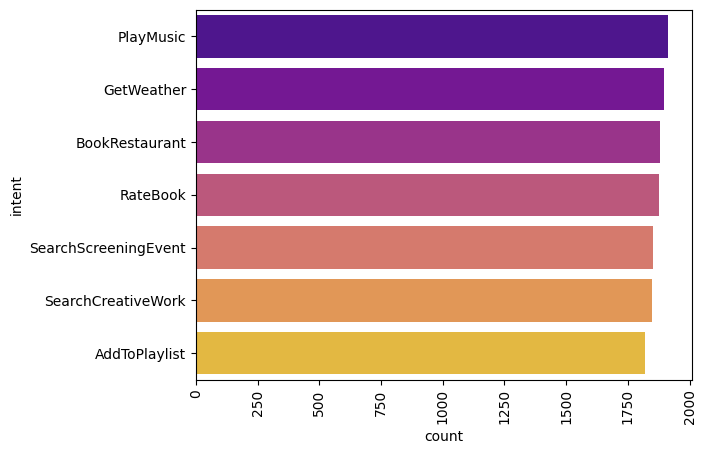

In [16]:
index_values_counts=df['intent'].value_counts().index
sns.countplot(data=df,y='intent',order=index_values_counts,palette='plasma')
plt.xticks(rotation=90)
plt.show()

In [17]:

df['intent']=df['intent'].str.lower()

stop_word=set(stopwords.words('english'))
def clean_data(text):
  text=text.lower()
  text=re.sub(r'\s+',' ',text,re.MULTILINE)
  text=[word for word in word_tokenize(text) if word not in stop_word]
  text=' '.join(text)
  return text

df['text']=df['text'].apply(lambda x: clean_data(x) )

In [18]:
df

,text,intent
0,listen westbam alumb allergic google music,playmusic
1,add step 50 clásicos playlist,addtoplaylist
2,give current textbook rating value 1 best rati...,ratebook
3,play song little robin redbreast,playmusic
4,please add iris dement playlist selena,addtoplaylist
...,...,...
13079,want eat choucroute brasserie 8,bookrestaurant
13080,play funky heavy bluesy,playmusic
13081,rate current album 2 points 6,ratebook
13082,go photograph inflated tear,searchcreativework


# Encoding Label

In [22]:
label=df['intent'].unique()
map_label={label:i for i,label in enumerate(label)}
df['intent_label']=df['intent'].map(map_label)



In [ ]:
df.sample(5)

,text,intent,intent_label
12645,find photograph called greatest hits volume one,searchcreativework,6
405,search song called journal american statistica...,searchcreativework,6
9265,find soundtrack called enter chicken,searchcreativework,6
12789,want hear symphony kano,playmusic,0
11743,freezing 06:31:22,getweather,5


# Tokenizer

In [ ]:
tokeniz=DistilBertTokenizer.from_pretrained('distilbert/distilbert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
max_length=max([len(tokeniz.encode(text)) for text in df['text']])
def function_token(data):
  tokenize_data=tokeniz(data['text'],padding='max_length',truncation=True,max_length=max_length)
  tokenize_data['label']=data['intent_label']
  return tokenize_data

data_set=Dataset.from_pandas(df[['text','intent_label']])
data_set=data_set.map(function_token,batched=True)

Map:   0%|          | 0/13084 [00:00<?, ? examples/s]

In [ ]:
model=DistilBertForSequenceClassification.from_pretrained('distilbert/distilbert-base-uncased',num_labels=len(label))

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
traintestval=data_set.train_test_split(test_size=.2,seed=42,shuffle=True)
train_data=traintestval['train']
test_data=traintestval['test']
training_args = TrainingArguments(  # Define the training configurations
    output_dir="./results",  # Directory to save results (model checkpoints, logs, etc.)
    evaluation_strategy="epoch",  # Evaluate the model at the end of each epoch
    learning_rate=2e-5,  # Set learning rate for the optimizer
    per_device_train_batch_size=16,  # Batch size for training (number of examples per device)
    per_device_eval_batch_size=64,  # Batch size for evaluation
    num_train_epochs=3,  # Number of epochs to train the model
    weight_decay=0.01,  # L2 regularization to avoid overfitting
    logging_dir="./logs",  # Directory to store training logs
    logging_steps=10,  # Log training information every 10 steps
)

trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data
)
trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: zm463454 (zm463454-student) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.036100,0.069016
2,0.025300,0.072236
3,0.050400,0.071231


TrainOutput(global_step=1965, training_loss=0.11794690424315726, metrics={'train_runtime': 195.4109, 'train_samples_per_second': 160.692, 'train_steps_per_second': 10.056, 'total_flos': 227498889230424.0, 'train_loss': 0.11794690424315726, 'epoch': 3.0})

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       396
           1       0.99      0.99      0.99       384
           2       1.00      1.00      1.00       362
           3       0.97      0.98      0.97       369
           4       1.00      0.99      0.99       381
           5       0.99      1.00      1.00       403
           6       0.96      0.96      0.96       322

    accuracy                           0.98      2617
   macro avg       0.98      0.98      0.98      2617
weighted avg       0.98      0.98      0.98      2617



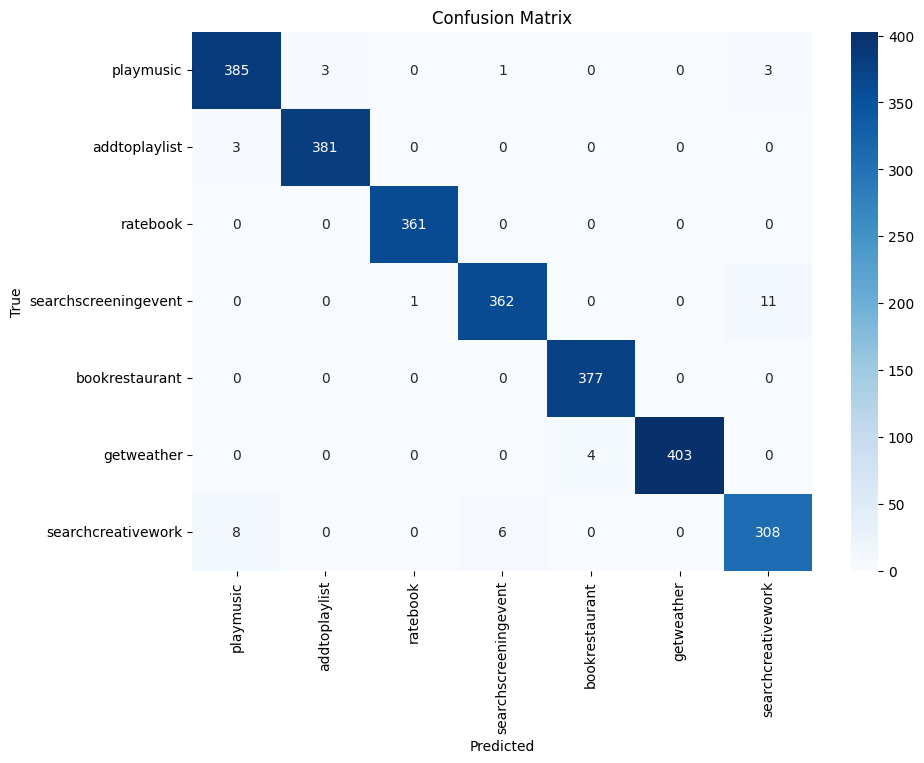

In [ ]:
predicted,label,_=trainer.predict(test_data)
predicted=np.argmax(predicted,axis=1)
print(classification_report(predicted,label))
cm = confusion_matrix(label, predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(map_label.keys()), yticklabels=list(map_label.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
trainer.save_model('model_token_train')
tokeniz.save_pretrained('model_token_train')

('model_token_train/tokenizer_config.json',
 'model_token_train/special_tokens_map.json',
 'model_token_train/vocab.txt',
 'model_token_train/added_tokens.json')

In [ ]:
import shutil

file_path = '/content/model_token_train'

zip_name = 'Model'

shutil.make_archive(zip_name.replace('.zip', ''), 'zip', file_path)


'/content/Model.zip'

In [ ]:
from zipfile import ZipFile
def extract_file(file):
    with ZipFile(file,'r' ) as r:
       r.extractall()

extract_file('/content/model (2).zip')

In [5]:
import torch
print(torch.__version__)


2.6.0+cu124


In [19]:
model=AutoModelForSequenceClassification.from_pretrained('model')
tokenizer=AutoTokenizer.from_pretrained('model')
def predict(text):
    text = clean_data(text)
    token = tokenizer(text, padding='max_length', truncation=True, return_tensors='pt')
    outputs = model(**token)
    logits = outputs.logits
    predict_label = torch.argmax(logits, dim=1).item()
    return predict_label


In [23]:
prd=predict("What's the weather like today?")


In [26]:
map_label

{'playmusic': 0,
 'addtoplaylist': 1,
 'ratebook': 2,
 'searchscreeningevent': 3,
 'bookrestaurant': 4,
 'getweather': 5,
 'searchcreativework': 6}

In [27]:
numeric_label={ value :key for key ,value in map_label.items()}
numeric_label

{0: 'playmusic',
 1: 'addtoplaylist',
 2: 'ratebook',
 3: 'searchscreeningevent',
 4: 'bookrestaurant',
 5: 'getweather',
 6: 'searchcreativework'}

In [25]:
numeric_label.get(prd)

'getweather'